## Pre-Read



### Using Colab

You will be editing and running code in this Colab notebook. If you are unfamiliar with Colab notebooks, we recommend taking a few minutes to learn about them [here](https://colab.research.google.com/notebooks/intro.ipynb#).

#### The Environment
This Colab notebook is running on an instance with 2 CPUs and 13GB of RAM.

### Real Time Bidding Auctions
One of the most common ways websites make money is through ads. Websites that run ads, like NYTimes.com, sell their adspace at auction in Real Time Bidding (RTB) markets. RTB auctions are lightning fast (100 milliseconds), and there are millions of auctions per second. If you want to buy ad space, you’re going need some seriously fast technology to help you participate in these auctions! We use a variety of data to automatically determine whether we bid and how much to bid on your behalf. If our bid is the highest in the auction, we get to show people your ad.

### About the Data Set

The data set used in this exercise contains information from thousands of auctions that we won during one week. Each row has a unique `BidFeedbackId` and represents an instance of an ad being shown to a user. We call each row an *impression*. The `CreativeId` column identifies which ad we showed. The `TDID` column represents which user device we showed the ad to. We've filtered the data such that *all the `TDID`s are from the devices of people that work or study at one of three locations.* Two of the locations are well known tech companies. One location is a university.

### Your Task

Can you use data analysis to make an educated guess about the names of the locations represented by each of the three `Location` column ids?

## Setup *(do not edit)*
Please avoid editing code in this section. This is where we load in the dataset and prepare the data for the exercise. You should start by running the code cell in this section by selecting it and pressing `Shift+Enter`.

In [3]:
# Please, do not edit this cell

import pandas as pd

path_data = "s3://thetradedesk-fileshare/Data_Science/External/DataForCandidateSampled.csv"
df_imps = pd.read_csv(path_data, parse_dates=[1]).set_index('BidFeedbackId')

## Analyze *(you may edit)*
For each of the three ids in the Location column, **can you guess the *name* of the institution?** *HINT: Two of the locations are well known tech companies. One location is a university.*

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.cm import ScalarMappable

In [3]:
df_imps.head()

,LogEntryTime,CreativeId,AdFormat,WinningPriceCPMInBucks,Site,DeviceType,OSFamily,OS,Browser,RenderingContext,TemperatureInCelsius,Location,TDID
BidFeedbackId,,,,,,,,,,,,,
2efcd9d6-aa7e-4d28-8c40-046b1f5c3380,2019-02-05 19:55:35.665500,yz3dcmu5,640x360,9.822400,bgr.com,PC,Windows,Windows10,Chrome,Other,NaN,2,140823.0
4bee1dbc-4c22-48df-b871-4c8f5d622b75,2019-02-06 20:41:06.098200,w5nfniw0,640x360,5.700000,www.yahoo.com,PC,Windows,Windows10,Chrome,Other,-0.21,2,96342.0
5f5fa723-7687-49d5-a426-9816440c661d,2019-02-07 05:43:24.024600,e36upnpp,300x50,0.150800,393630966,Mobile,iOS,iOS121,WebView,InApp,8.35,1,369932.0
5a12c165-cb87-492c-9994-e17e51ca883d,2019-02-05 18:47:13.092000,bl4j44t0,320x50,3.580941,wis.pr,Mobile,Android,Android50,Chrome,Other,-3.51,2,586682.0
006dfed2-048a-4dee-8a92-74c0c95b7561,2019-02-07 22:10:26.780800,wipt600h,160x600,0.269040,www.wenxuecity.com,PC,Windows,Windows10,Chrome,Other,NaN,2,115644.0


In [5]:
set(df_imps['RenderingContext'])

{'InApp', 'MobileOptimizedWeb', 'Other', nan}

In [4]:
df_imps['Location'].value_counts()

2    70467
3    31426
1    13123
Name: Location, dtype: int64

In [5]:
df_imps.query("Location=='1'")['Site'].value_counts()

Series([], Name: Site, dtype: int64)

1. Gathering Basic Information about the Provided Data

In [6]:
df_imps.info()

<class 'pandas.core.frame.DataFrame'>
Index: 115016 entries, 2efcd9d6-aa7e-4d28-8c40-046b1f5c3380 to e784e5e6-9036-4835-8906-a4d1e9239013
Data columns (total 13 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   LogEntryTime            115016 non-null  datetime64[ns]
 1   CreativeId              115016 non-null  object        
 2   AdFormat                115016 non-null  object        
 3   WinningPriceCPMInBucks  115016 non-null  float64       
 4   Site                    115016 non-null  object        
 5   DeviceType              115016 non-null  object        
 6   OSFamily                115005 non-null  object        
 7   OS                      114911 non-null  object        
 8   Browser                 114910 non-null  object        
 9   RenderingContext        115013 non-null  object        
 10  TemperatureInCelsius    40474 non-null   float64       
 11  Location                115016 

In [7]:
df_imps.describe()

,WinningPriceCPMInBucks,TemperatureInCelsius,Location,TDID
count,115016.000000,40474.000000,115016.000000,115016.000000
mean,3.176044,5.016212,2.159134,295149.544637
std,5.269957,6.624247,0.601671,169466.212673
min,0.000000,-17.910000,1.000000,2.000000
25%,0.495000,-0.600000,2.000000,148623.000000
50%,1.387500,7.010000,2.000000,293471.000000
75%,3.663000,10.220000,3.000000,441820.000000
max,166.056000,24.470000,3.000000,592732.000000


In [8]:
df_imps.shape

(115016, 13)

2. Checking for null values and duplicates in the data. Then checking if duplicates are authentic by looking at 'LogEntryTime'. Then removing duplicates because they can affect data analysis and creating new dataframe without duplicates called 'df_imps2'.

In [9]:
df_imps.isna().any()

LogEntryTime              False
CreativeId                False
AdFormat                  False
WinningPriceCPMInBucks    False
Site                      False
DeviceType                False
OSFamily                   True
OS                         True
Browser                    True
RenderingContext           True
TemperatureInCelsius       True
Location                  False
TDID                      False
dtype: bool

In [10]:
df_imps.duplicated().any()

True

In [11]:
duplicate_rows = df_imps[df_imps.duplicated()]

In [12]:
duplicate_rows

,LogEntryTime,CreativeId,AdFormat,WinningPriceCPMInBucks,Site,DeviceType,OSFamily,OS,Browser,RenderingContext,TemperatureInCelsius,Location,TDID
BidFeedbackId,,,,,,,,,,,,,
ab54ecbf-6533-47f1-986e-82cfdca86c23,2019-02-07 18:22:42.066600,w351rbns,300x250,0.25000,www.abbreviations.com,Mobile,Android,Other,Chrome,Other,NaN,3,414432.0
1d63e213-8d7b-49b3-bbef-1256b66cef12,2019-02-03 21:47:35.332600,xadv1k10,300x250,1.02900,www.nbcsports.com,Mobile,iOS,iOS121,WebView,Other,17.54,1,408920.0
38b01be6-6e64-450f-a610-1fe6fe084c04,2019-02-02 06:33:01.470700,q0uzjrzl,300x250,4.05950,kenh14.vn,PC,Windows,Windows10,Edge,Other,NaN,2,337051.0
fe32b5a4-02ef-4307-b985-e6fc81b83268,2019-02-07 03:31:09.987700,901fzlff,160x600,9.60480,www.8notes.com,PC,Windows,Windows10,Edge,Other,NaN,2,15055.0
cc8a2c63-819c-4545-9505-856a3d77c492,2019-02-03 17:33:14.368700,qhfa520q,300x250,6.01700,www.si.com,PC,Windows,Windows10,Chrome,Other,NaN,2,27440.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
f640b469-53f2-45f3-b603-77d0afcc09fb,2019-02-03 23:41:16.311400,s8azbqcs,728x90,0.50160,www.eurogamer.net,PC,Windows,Windows10,Firefox,Other,NaN,3,342043.0
83a8ca6e-7082-429a-8c4d-d5052629a058,2019-02-03 08:42:29.724300,ituubp98,300x250,5.52444,www.seattlepi.com,PC,Windows,Windows10,Edge,Other,4.72,2,198710.0
0cdf864a-6268-4c74-856e-d9b81406565a,2019-02-01 08:10:45.696400,mrvz4y6e,300x250,8.51000,www.wired.com,Mobile,Android,Android70,Chrome,MobileOptimizedWeb,NaN,2,290874.0


In [13]:
duplicate_rows['LogEntryTime']

BidFeedbackId
ab54ecbf-6533-47f1-986e-82cfdca86c23   2019-02-07 18:22:42.066600
1d63e213-8d7b-49b3-bbef-1256b66cef12   2019-02-03 21:47:35.332600
38b01be6-6e64-450f-a610-1fe6fe084c04   2019-02-02 06:33:01.470700
fe32b5a4-02ef-4307-b985-e6fc81b83268   2019-02-07 03:31:09.987700
cc8a2c63-819c-4545-9505-856a3d77c492   2019-02-03 17:33:14.368700
                                                  ...            
f640b469-53f2-45f3-b603-77d0afcc09fb   2019-02-03 23:41:16.311400
83a8ca6e-7082-429a-8c4d-d5052629a058   2019-02-03 08:42:29.724300
0cdf864a-6268-4c74-856e-d9b81406565a   2019-02-01 08:10:45.696400
54f6e86c-02a1-4b98-9174-8eb2682f2885   2019-02-02 06:20:17.491700
12b575de-47dd-4cdb-b186-43dee7f57a9a   2019-02-03 01:39:22.515700
Name: LogEntryTime, Length: 65, dtype: datetime64[ns]

In [14]:
pd.set_option('display.max_rows', None)

In [15]:
duplicate_rows_BidId = duplicate_rows.index

In [16]:
duplicate_comparison = pd.DataFrame(index=duplicate_rows_BidId)
duplicate_comparison['LogEntryTime_duplicate_rows'] = duplicate_rows['LogEntryTime']

duplicate_comparison['LogEntryTime_original'] = df_imps.loc[duplicate_rows_BidId, 'LogEntryTime']

duplicate_comparison

,LogEntryTime_duplicate_rows,LogEntryTime_original
BidFeedbackId,,
ab54ecbf-6533-47f1-986e-82cfdca86c23,2019-02-07 18:22:42.066600,2019-02-07 18:22:42.066600
1d63e213-8d7b-49b3-bbef-1256b66cef12,2019-02-03 21:47:35.332600,2019-02-03 21:47:35.332600
38b01be6-6e64-450f-a610-1fe6fe084c04,2019-02-02 06:33:01.470700,2019-02-02 06:33:01.470700
fe32b5a4-02ef-4307-b985-e6fc81b83268,2019-02-07 03:31:09.987700,2019-02-07 03:31:09.987700
cc8a2c63-819c-4545-9505-856a3d77c492,2019-02-03 17:33:14.368700,2019-02-03 17:33:14.368700
97fd7f70-d620-42d6-a4b6-ce74dfd947ee,2019-02-07 21:40:46.118500,2019-02-07 21:40:46.118500
4b984ba0-17f7-40d7-9726-9e75604caba7,2019-02-03 16:17:34.045000,2019-02-03 16:17:34.045000
f8024378-ce8b-48b5-9697-0ab0555db82d,2019-02-07 21:02:52.261700,2019-02-07 21:02:52.261700
96390578-076b-4db4-8be8-d8b1ddc262b4,2019-02-04 22:29:58.735000,2019-02-04 22:29:58.735000


In [17]:
pd.reset_option('display.max_rows')

In [18]:
df_imps2 = df_imps.drop_duplicates()

In [19]:
df_imps2

,LogEntryTime,CreativeId,AdFormat,WinningPriceCPMInBucks,Site,DeviceType,OSFamily,OS,Browser,RenderingContext,TemperatureInCelsius,Location,TDID
BidFeedbackId,,,,,,,,,,,,,
2efcd9d6-aa7e-4d28-8c40-046b1f5c3380,2019-02-05 19:55:35.665500,yz3dcmu5,640x360,9.822400,bgr.com,PC,Windows,Windows10,Chrome,Other,NaN,2,140823.0
4bee1dbc-4c22-48df-b871-4c8f5d622b75,2019-02-06 20:41:06.098200,w5nfniw0,640x360,5.700000,www.yahoo.com,PC,Windows,Windows10,Chrome,Other,-0.21,2,96342.0
5f5fa723-7687-49d5-a426-9816440c661d,2019-02-07 05:43:24.024600,e36upnpp,300x50,0.150800,393630966,Mobile,iOS,iOS121,WebView,InApp,8.35,1,369932.0
5a12c165-cb87-492c-9994-e17e51ca883d,2019-02-05 18:47:13.092000,bl4j44t0,320x50,3.580941,wis.pr,Mobile,Android,Android50,Chrome,Other,-3.51,2,586682.0
006dfed2-048a-4dee-8a92-74c0c95b7561,2019-02-07 22:10:26.780800,wipt600h,160x600,0.269040,www.wenxuecity.com,PC,Windows,Windows10,Chrome,Other,NaN,2,115644.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2f4abe8e-7ce3-4d40-9431-8030e6e99f45,2019-02-06 19:41:40.921200,6b8ri9kx,728x90,2.020000,www.cnn.com,PC,Windows,Windows10,Chrome,Other,-2.71,2,554662.0
2acc915d-6cf7-4b6f-ac68-a378ab5307f7,2019-02-07 09:14:00.127200,h3yuzzfd,320x50,0.537075,335744614,Mobile,iOS,iOS121,WebView,InApp,NaN,1,492750.0
9ee5eabc-261e-41de-99a0-942fabce5592,2019-02-07 23:54:22.583600,c0ljy6wq,300x250,1.677850,www.zimbio.com,PC,Windows,Windows10,Edge,Other,3.12,2,536730.0


3. Looking at sites visited along with their counts grouped by Location. Then Location's sites visited along with their counts are looked at individually.

In [20]:
top_sites = df_imps2.groupby('Location')['Site'].value_counts()
top5_sites = top_sites.groupby('Location').head(5)
top5_sites

Location  Site               
1         mail.yahoo.com          607
          www.wenxuecity.com      485
          www.yahoo.com           426
          295646461               370
          www.cnn.com             241
2         mail.yahoo.com         1601
          www.cnn.com            1184
          www.msn.com            1029
          www.wenxuecity.com      940
          www.accuweather.com     856
3         www.spanishdict.com    1045
          www.sparknotes.com      792
          www.slader.com          744
          www.spotify.com         742
          mail.yahoo.com          732
Name: Site, dtype: int64

In [21]:
pd.set_option('display.max_rows', None)
top20_sites = top_sites.groupby('Location').head(20)
top20_sites

Location  Site                      
1         mail.yahoo.com                 607
          www.wenxuecity.com             485
          www.yahoo.com                  426
          295646461                      370
          www.cnn.com                    241
          www.sfgate.com                 208
          finance.yahoo.com              192
          341232718                      191
          584632814                      185
          www.spotify.com                180
          www.washingtonpost.com         168
          weather.com                    132
          335744614                      131
          wis.pr                         123
          people.com                     117
          slickdeals.net                 102
          www.seriouseats.com             98
          www.theverge.com                93
          317469184                       87
          offbeat.topix.com               86
2         mail.yahoo.com                1601
          www.cnn.

In [22]:
target_location = 1
sites_location1 = df_imps2[df_imps2['Location'] == target_location]['Site']
sites_location1_count = sites_location1.value_counts()
sites_location1_count.head(100)

mail.yahoo.com               607
www.wenxuecity.com           485
www.yahoo.com                426
295646461                    370
www.cnn.com                  241
www.sfgate.com               208
finance.yahoo.com            192
341232718                    191
584632814                    185
www.spotify.com              180
www.washingtonpost.com       168
weather.com                  132
335744614                    131
wis.pr                       123
people.com                   117
slickdeals.net               102
www.seriouseats.com           98
www.theverge.com              93
317469184                     87
offbeat.topix.com             86
www.allrecipes.com            78
www.ebay.com                  77
545551605                     76
www.dailymail.co.uk           74
listenonrepeat.com            74
www.nasdaq.com                72
arstechnica.com               71
486154808                     71
www.cheapoair.com             66
www.vox.com                   65
community.

In [23]:
target_location = 2
sites_location2 = df_imps2[df_imps2['Location'] == target_location]['Site']
sites_location2_count = sites_location2.value_counts()
sites_location2_count.head(100)

mail.yahoo.com                 1601
www.cnn.com                    1184
www.msn.com                    1029
www.wenxuecity.com              940
www.accuweather.com             856
www.instructables.com           805
weather.com                     791
www.c-sharpcorner.com           751
295646461                       725
www.yahoo.com                   705
www.dailymail.co.uk             685
arstechnica.com                 622
wis.pr                          618
finance.yahoo.com               602
www.washingtonpost.com          576
www.spotify.com                 484
outlook.live.com                471
www.king5.com                   457
komonews.com                    444
www.pythonforbeginners.com      429
vimeo.com                       428
www.reddit.com                  405
people.com                      383
www.espncricinfo.com            375
www.ebay.com                    363
stocktwits.com                  350
seekingalpha.com                350
www.usatoday.com            

In [24]:
target_location = 3
sites_location3 = df_imps2[df_imps2['Location'] == target_location]['Site']
sites_location3_count = sites_location3.value_counts()
sites_location3_count.head(1000)

www.spanishdict.com                                        1045
www.sparknotes.com                                          792
www.slader.com                                              744
www.spotify.com                                             742
mail.yahoo.com                                              732
www.yahoo.com                                               690
www.ratemyprofessors.com                                    657
429610587                                                   627
www.thesaurus.com                                           570
quizlet.com                                                 534
weather.com                                                 434
www.buzzfeed.com                                            429
www.evite.com                                               398
295646461                                                   355
332510494                                                   331
www.cnn.com                             

In [25]:
print(df_imps2['Site'].dtype)

object


In [26]:
site_types = df_imps2['Site'].apply(type)

unique_site_types = site_types.unique()
print(unique_site_types)

[<class 'str'>]


4. Looking at devices along with their counts grouped by Location.

In [27]:
top_DeviceType = df_imps2.groupby('Location')['DeviceType'].value_counts()
top5_DeviceType = top_DeviceType.groupby('Location').head(5)
top5_DeviceType

Location  DeviceType 
1         PC              7070
          Mobile          5677
          Tablet           367
          Other              3
2         PC             58538
          Mobile         11686
          Tablet           201
          Other              3
          ConnectedTV        2
3         PC             21051
          Mobile          9728
          Tablet           621
          Other              3
          ConnectedTV        1
Name: DeviceType, dtype: int64

5. Looking at OS and OSFamily along with their counts grouped by Location.

In [28]:
top_OS = df_imps2.groupby('Location')['OS'].value_counts()
top5_OS = top_OS.groupby('Location').head(5)
top5_OS

Location  OS       
1         Other         6987
          iOS121        3431
          Windows10     1179
          Android80      585
          Windows7       335
2         Windows10    55967
          iOS121        5250
          Other         4594
          Android80     2208
          Windows8       493
3         Other        13923
          Windows10     7054
          iOS121        6647
          Android80     1255
          Windows7       990
Name: OS, dtype: int64

In [29]:
top_OSFam = df_imps2.groupby('Location')['OSFamily'].value_counts()
top5_OSFam = top_OSFam.groupby('Location').head(5)
top5_OSFam

Location  OSFamily
1         OSX          5320
          iOS          4542
          Windows      1535
          Android      1511
          Linux         189
2         Windows     57087
          Android      6022
          iOS          5834
          OSX          1381
          Linux          64
3         OSX         12677
          Windows      8158
          iOS          7938
          Android      2407
          Linux         204
Name: OSFamily, dtype: int64

6. Looking at browsers along with their counts grouped by Location.

In [30]:
top_Browser = df_imps2.groupby('Location')['Browser'].value_counts()
top5_Browser = top_Browser.groupby('Location').head(5)
top5_Browser

Location  Browser
1         Chrome      4587
          Safari      4331
          WebView     3699
          Firefox      201
          Edge         199
2         Edge       31548
          Chrome     27453
          WebView     5912
          Firefox     2658
          Safari      1747
3         Chrome     16482
          WebView     6625
          Safari      5622
          Firefox     1440
          Edge         854
Name: Browser, dtype: int64

7. Creating plots of the temperature in each Location where the x-axis are log entries and the y-axis are 
temperatures in Fahrenheit. Entries on the plot are color coded where hotter is red and colder is blue. 
Average temperature of each Location is displayed after the plot.

/var/folders/2r/zjg762q50c33q6m___bp8ggm0000gn/T/ipykernel_17719/1008732040.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_imps2['TemperatureInFahrenheit'] = (df_imps2['TemperatureInCelsius'] * 9/5) + 32
/var/folders/2r/zjg762q50c33q6m___bp8ggm0000gn/T/ipykernel_17719/1008732040.py:19: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm, label='Temperature')


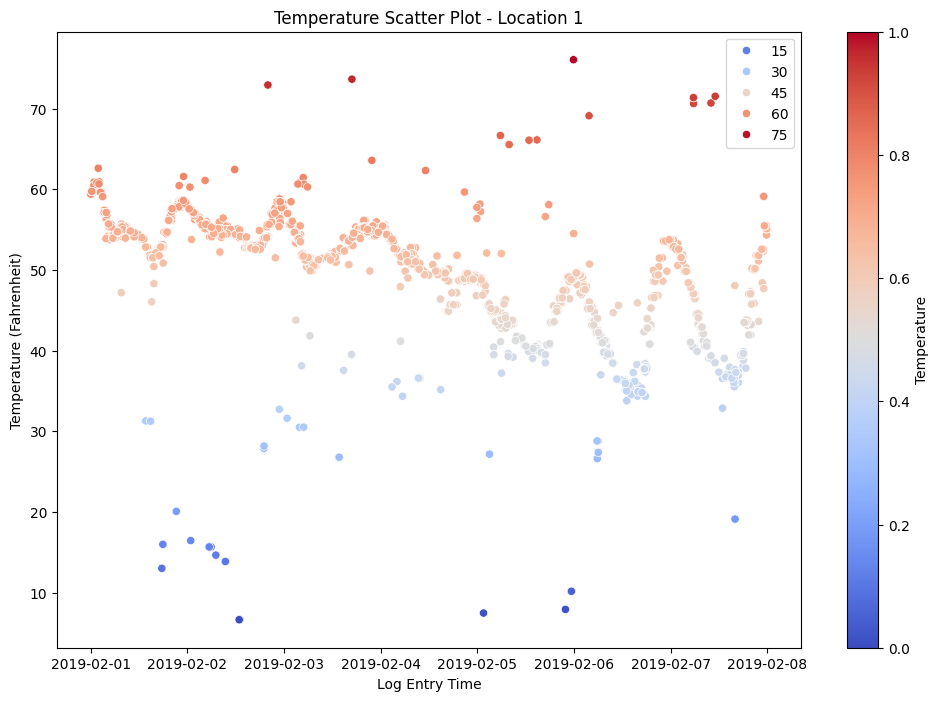

In [53]:
location_1_data = df_imps2[df_imps2['Location'] == 1]

df_imps2['TemperatureInFahrenheit'] = (df_imps2['TemperatureInCelsius'] * 9/5) + 32

palette = "coolwarm"

plt.figure(figsize=(12, 8))
scatter = sns.scatterplot(x='LogEntryTime', y='TemperatureInFahrenheit', data=location_1_data, hue='TemperatureInFahrenheit', palette=palette)

avg_temp_location_1 = df_imps2['TemperatureInFahrenheit'].mean()

plt.xlabel('Log Entry Time')
plt.ylabel('Temperature (Fahrenheit)')
plt.title('Temperature Scatter Plot - Location 1')

sm = plt.cm.ScalarMappable(cmap=palette)
sm.set_array([])

cbar = plt.colorbar(sm, label='Temperature')

plt.legend()

plt.show()


In [57]:
location1 = df_imps2[df_imps2['Location'] == 1]

avgtemp_location1 = location1['TemperatureInCelsius'].mean()
avgtemp_location1_fahrenheit = (avgtemp_location1 * 9/5) + 32
avgtemp_location1_fahrenheit

49.5415885115607

/var/folders/2r/zjg762q50c33q6m___bp8ggm0000gn/T/ipykernel_17719/2049767134.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_imps2['TemperatureInFahrenheit'] = (df_imps2['TemperatureInCelsius'] * 9/5) + 32
/var/folders/2r/zjg762q50c33q6m___bp8ggm0000gn/T/ipykernel_17719/2049767134.py:19: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm, label='Temperature')


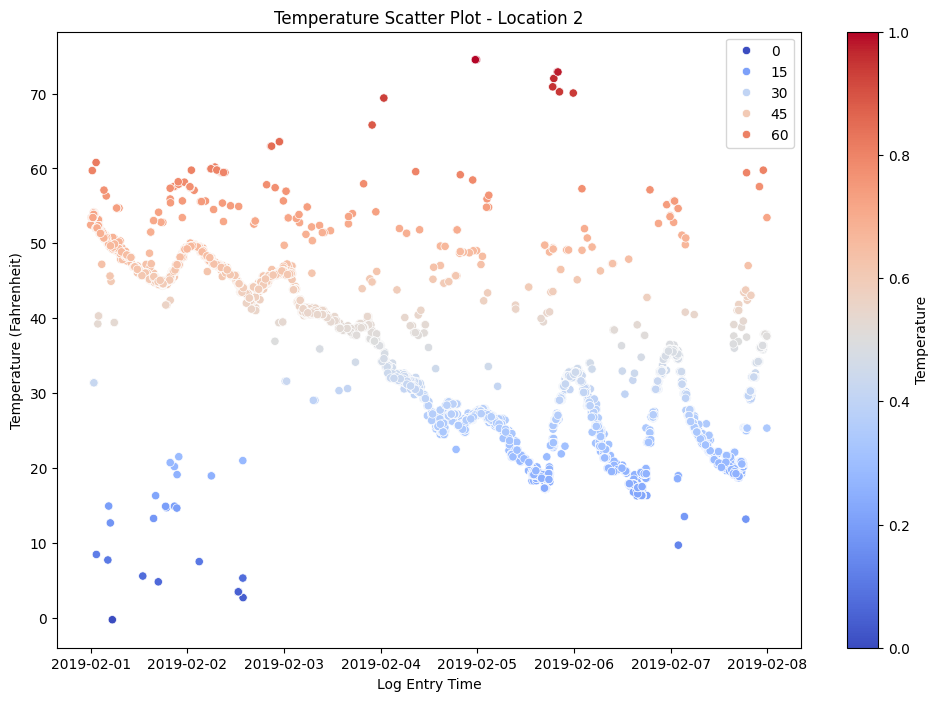

In [54]:
location_2_data = df_imps2[df_imps2['Location'] == 2]

df_imps2['TemperatureInFahrenheit'] = (df_imps2['TemperatureInCelsius'] * 9/5) + 32

palette = "coolwarm"

plt.figure(figsize=(12, 8))
scatter = sns.scatterplot(x='LogEntryTime', y='TemperatureInFahrenheit', data=location_2_data, hue='TemperatureInFahrenheit', palette=palette)

avg_temp_location_2 = df_imps2['TemperatureInFahrenheit'].mean()

plt.xlabel('Log Entry Time')
plt.ylabel('Temperature (Fahrenheit)')
plt.title('Temperature Scatter Plot - Location 2')

sm = plt.cm.ScalarMappable(cmap=palette)
sm.set_array([])

cbar = plt.colorbar(sm, label='Temperature')

plt.legend()

plt.show()

In [56]:
location2 = df_imps2[df_imps2['Location'] == 2]

avgtemp_location2 = location2['TemperatureInCelsius'].mean()
avgtemp_location2_fahrenheit = (avgtemp_location2 * 9/5) + 32
avgtemp_location2_fahrenheit

35.49696087264063

/var/folders/2r/zjg762q50c33q6m___bp8ggm0000gn/T/ipykernel_17719/832333591.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_imps2['TemperatureInFahrenheit'] = (df_imps2['TemperatureInCelsius'] * 9/5) + 32
/var/folders/2r/zjg762q50c33q6m___bp8ggm0000gn/T/ipykernel_17719/832333591.py:19: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm, label='Temperature')


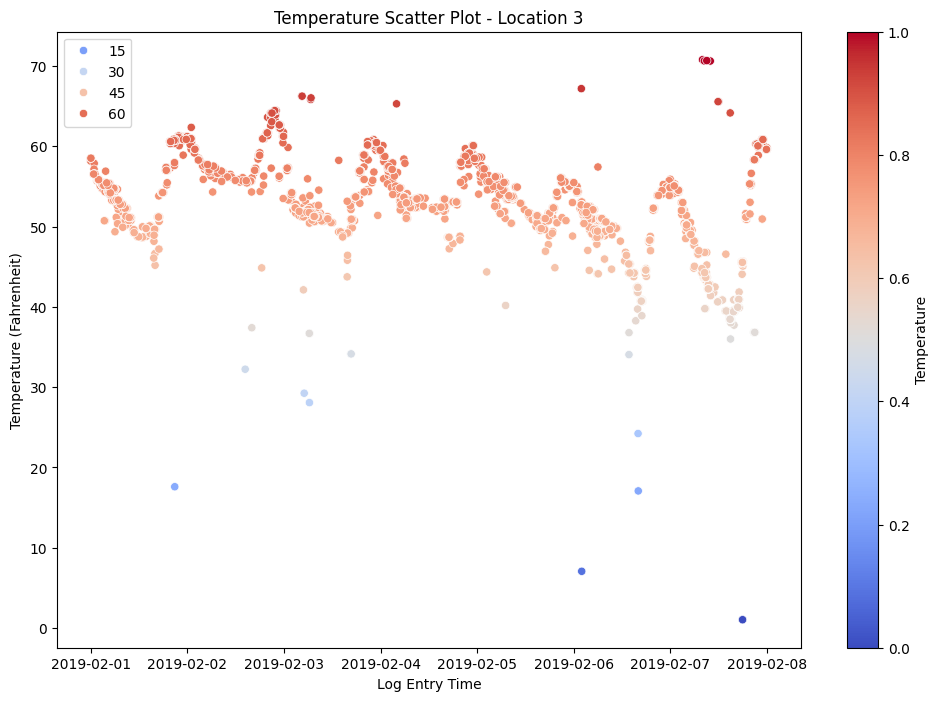

In [55]:
location_3_data = df_imps2[df_imps2['Location'] == 3]

df_imps2['TemperatureInFahrenheit'] = (df_imps2['TemperatureInCelsius'] * 9/5) + 32

palette = "coolwarm"

plt.figure(figsize=(12, 8))
scatter = sns.scatterplot(x='LogEntryTime', y='TemperatureInFahrenheit', data=location_3_data, hue='TemperatureInFahrenheit', palette=palette)

avg_temp_location_3 = df_imps2['TemperatureInFahrenheit'].mean()

plt.xlabel('Log Entry Time')
plt.ylabel('Temperature (Fahrenheit)')
plt.title('Temperature Scatter Plot - Location 3')

sm = plt.cm.ScalarMappable(cmap=palette)
sm.set_array([])

cbar = plt.colorbar(sm, label='Temperature')

plt.legend()

plt.show()

In [42]:
location3 = df_imps2[df_imps2['Location'] == 3]

avgtemp_location3 = location3['TemperatureInCelsius'].mean()
avgtemp_location3_fahrenheit = (avgtemp_location3 * 9/5) + 32
avgtemp_location3_fahrenheit

53.62626061057334

### Analysis Reflection

**What do you think Location 1 is and why?**
I think Location 1 is Apple because the majority of auctions won for the week at Location 1 were on OSX operating system with iOS being a close second. This is shown in Section 5. 

Also the browser choice for Location 1 bids was Chrome followed very closely by Safari which is the browser developed by Apple. This is shown in Section 6. 

Also the historical average temperature for the week of Feburary 01 - 08, 2019 for Cupertino, CA which is the headquarters of Apple matches the average temperature for the auctions for Location 1. Source for historical weather data (https://www.timeanddate.com/weather/usa/cupertino/historic?month=2&year=2019). This is shown in Section 7.  

**What do you think Location 2 is and why?**
I think Location 2 is Microsoft because the vast majority of auctions won for the week at Location 2 were on Windows operating system. This is shown in Section 5.

Also the browser choice for Location 2 bids was Edge which is the browser developed by Microsoft. This is shown in Section 6.

Also the historical average temperature for the week of Feburary 01 - 08, 2019 for Redmond, WA which is the headquarters of Microsoft matches the average temperature for the auctions for Location 2. Source for historical weather data (https://www.timeanddate.com/weather/usa/redmond/historic?month=2&year=2019). This is shown in Section 7. 

**What do you think Location 3 is and why?**
I think Location 3 is University of California San Diego (UCSD) because of the sites the auctions were won on for Location 3. Specifically Location 3 auctions #1 site was spanishdict.com and the #7 site was ratemyprofessors.com. These are both sites associated with Universities. UCSD was chosen because of the large number of auctions won on sites like sandiegouniontribune.com and 10news.com which is a San Diego local news site. I chose UCSD over other San Diego universities because UCSD is the largest university in San Diego and has the highest rated Spanish Language program among San Diego universities which combines with the fact that spanishdict.com is the #1 site. This is shown in Section 3. 

Also the historical average temperature for the week of Feburary 01 - 08, 2019 for San Diego, CA which is where UCSD is located almost matches the average temperature for the auctions for Location 3. The average temperature for auctions for Location 3 is 6 degrees lower than the historic San Diego average temperature during the same time but this could be explained due to the fact that UCSD is near the coast so it is more temperate and would not heat as quickly as the rest of San Diego. Source for historical weather data (https://www.timeanddate.com/weather/usa/san-diego/historic?month=2&year=2019). This is shown in Section 7. 